# Análisis índice de marginación

Primeramente, importamos las librerías que se van a utilizar a lo largo de la libreta y leemos el archivo deseado del URL de la página, creando además el DataFrame que se va a manipular.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

url='http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls'

#DataFrame
IMM_2020 = pd.read_excel(url, sheet_name='IMM_2020')
IMM_2020


,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32,Zacatecas,32054,Villa Hidalgo,19446,7.497894,36.678176,3.010808,0.452908,2.254246,1.137416,21.932484,100.000000,90.877128,55.044146,Bajo,0.861915
2465,32,Zacatecas,32055,Villanueva,31558,4.199744,44.806459,2.536486,0.551254,1.073864,0.895418,15.269627,56.774827,81.912592,56.747058,Muy bajo,0.888580
2466,32,Zacatecas,32056,Zacatecas,149607,1.442438,19.436229,0.294739,0.163292,1.278559,0.484463,9.340958,7.461549,57.885307,60.176191,Muy bajo,0.942275
2467,32,Zacatecas,32057,Trancoso,20455,5.119108,31.992586,3.066130,0.500392,2.860086,1.344192,23.544577,16.788071,83.056133,56.958073,Muy bajo,0.891884


Mostramos ahora una descripción básica de este DataFrame.

In [84]:
IMM_2020.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Con una simple inspección visual, se vió que ciertas variables tienen mínimos y máximos muy distintos. Por ejemplo, ANALF (Porcentaje de población analfabeta de 15 años o más) tiene un valor mínimo de 0.353446 y un valor máximo de 53.071253. Otros ejemplos son OVSDE con un valor mínimo de 0 y uno máximo de 53.065463. Se cree que las observaciones anteriores dan de alguna forma evidencia del problema de desigualdad que existe en el país. Otra observación es que el promedio del índice de marginación IM_2020 está relativamente cerca de su valor máximo

## Algunas gráficas

Daremos primero una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "Muy bajo", "Bajo", "Medio", "Alto" y "Muy alto", y luego otra que muestre el porcentaje de la población, respecto a la población total de cada estado, con estos mismos índices.

In [85]:
IMM_2020_GM20 = IMM_2020[['NOM_ENT', 'GM_2020']]
IMM_2020_GM20_crosstab = pd.crosstab(index=IMM_2020_GM20['NOM_ENT'], columns=IMM_2020_GM20['GM_2020'],
                             normalize="index").reindex(columns=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
IMM_2020_GM20_crosstab

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto
NOM_ENT,,,,,
Aguascalientes,1.000000,0.000000,0.000000,0.000000,0.000000
Baja California,0.833333,0.000000,0.166667,0.000000,0.000000
Baja California Sur,1.000000,0.000000,0.000000,0.000000,0.000000
Campeche,0.166667,0.500000,0.166667,0.166667,0.000000
Chiapas,0.008065,0.056452,0.241935,0.532258,0.161290
Chihuahua,0.462687,0.283582,0.059701,0.029851,0.164179
Ciudad de México,1.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,0.789474,0.210526,0.000000,0.000000,0.000000
Colima,0.800000,0.200000,0.000000,0.000000,0.000000


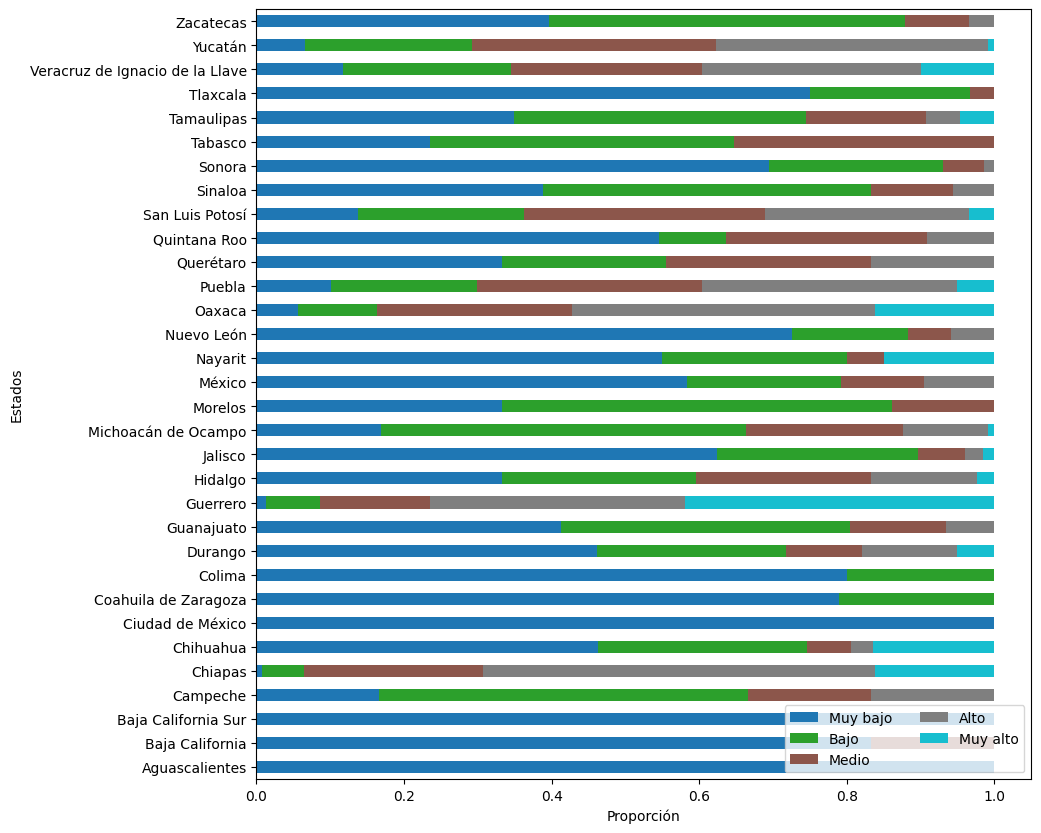

In [86]:
IMM_2020_GM20_crosstab.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 10))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Proporción")
plt.ylabel("Estados")
plt.savefig('Porcentaje_Municipios_Índices.png')
plt.show()

Preparamos ahora la segunda gráfica.

In [87]:
IMM_2020_GM20_Pob = IMM_2020.pivot_table(values='POB_TOT', index='NOM_ENT', columns='GM_2020', aggfunc='sum', fill_value=0)
IMM_2020_GM20_Pob_Normalizada = IMM_2020_GM20_Pob.apply(lambda x: x / x.sum(), axis=1).reindex(columns=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
IMM_2020_GM20_Pob_Normalizada

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto
NOM_ENT,,,,,
Aguascalientes,1.000000,0.000000,0.000000,0.000000,0.000000
Baja California,0.968807,0.000000,0.031193,0.000000,0.000000
Baja California Sur,1.000000,0.000000,0.000000,0.000000,0.000000
Campeche,0.584816,0.275745,0.054745,0.084694,0.000000
Chiapas,0.108977,0.180050,0.212392,0.310369,0.188213
Chihuahua,0.911385,0.027347,0.005369,0.006977,0.048922
Ciudad de México,1.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,0.983870,0.016130,0.000000,0.000000,0.000000
Colima,0.954540,0.045460,0.000000,0.000000,0.000000


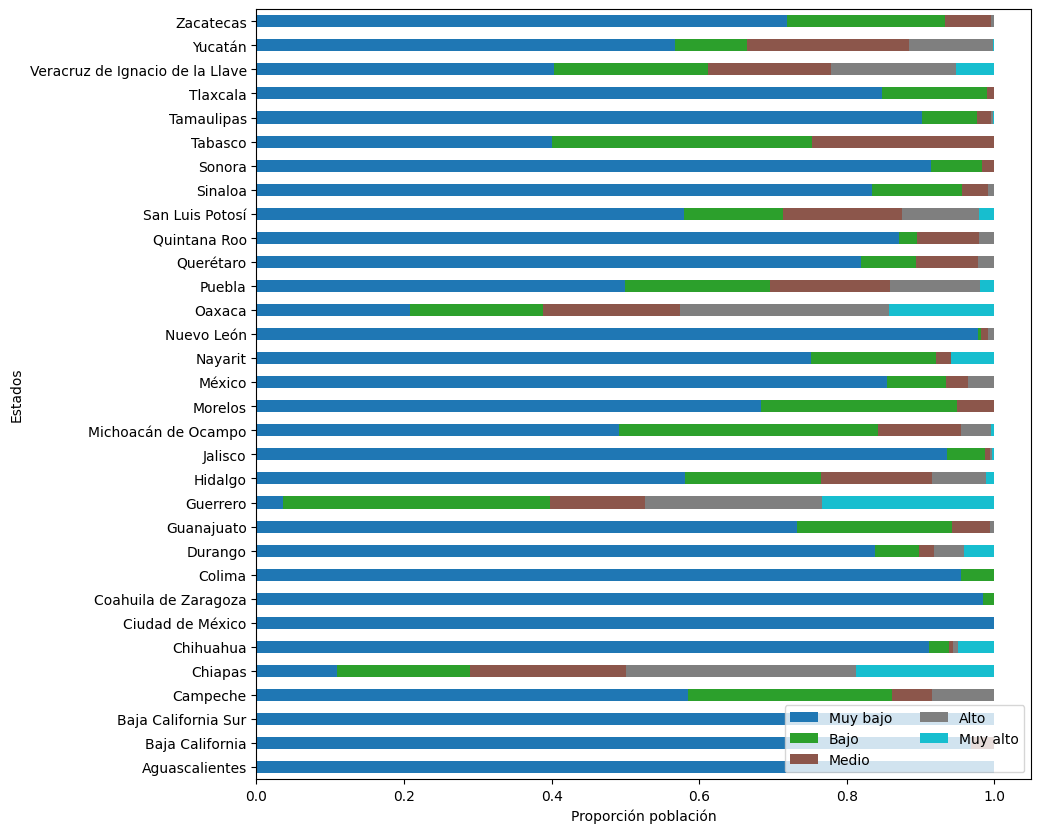

In [88]:
IMM_2020_GM20_Pob_Normalizada.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 10))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Proporción población")
plt.ylabel("Estados")
plt.savefig('Porcentaje_Población_Índices.jpg')
plt.show()

Realmente no hay muchas coincidencias entre ambas gráficas. En general, el porcentaje de población con índice "Muy bajo" es mucho mayor que el porcentaje de municipios con este mismo índice. Ante esto, se podría decir que muchos municipios con índice "Muy bajo" tienen una población considerablemente más grande a comparación de otros con índice distinto.

Procedemos ahora a obtener una visualización de la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.

<Axes: xlabel='PL.5000', ylabel='ANALF'>

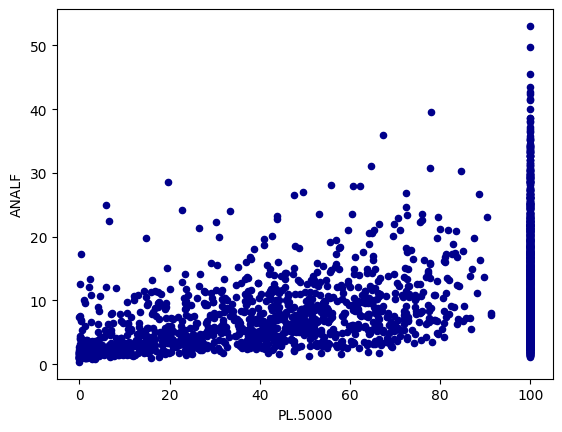

In [89]:
IMM_2020_ANALF_PL5000 = IMM_2020[['ANALF', 'PL.5000']]
IMM_2020_ANALF_PL5000.plot.scatter(x='PL.5000',
                      y='ANALF',
                      c='DarkBlue')

Se podría decir que existe una pequeña correlación positiva. Por otro lado, para analizar con que variable el porcentaje de población analfabeta de 15 años o más tiene más correlación, utilizamos el método corr().

In [90]:
list = ['POB_TOT', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM', 'IM_2020']
for x in list:
    print("La correlación del porcentaje de analfabetismo en personas mayores de 15 años con "+x+ " es: "+str(IMM_2020['ANALF'].corr(IMM_2020[x])))

La correlación del porcentaje de analfabetismo en personas mayores de 15 años con POB_TOT es: -0.23680051523423448
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con SBASC es: 0.7790527533171037
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con OVSDE es: 0.3475374317994142
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con OVSEE es: 0.3515228932295543
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con OVSAE es: 0.3606437829290125
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con OVPT es: 0.644959869039561
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con VHAC es: 0.6585318233278291
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con PL.5000 es: 0.44932439352239967
La correlación del porcentaje de analfabetismo en personas mayores de 15 años con PO2SM es: 0.62001089339180

Aparentemente, las dos variables que poseen mayor relación con ANALF es el porcentaje de población de 15 años o más sin educación básica (o SBASC) y el mismo índice de marginación o IM_2020 (este último con correlación negativa). Procedemos a graficar los scatterplots de ambas relaciones.

<Axes: xlabel='SBASC', ylabel='ANALF'>

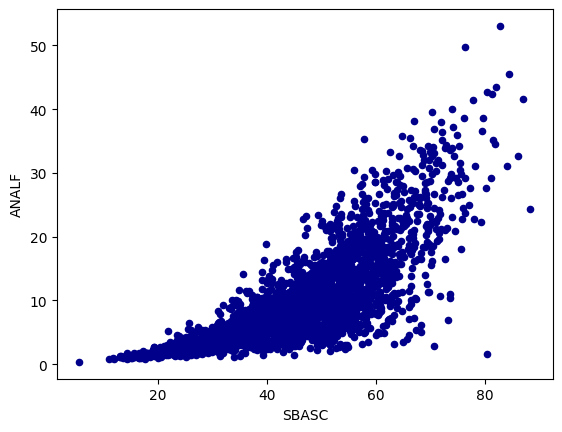

In [91]:
IMM_2020_ANALF_SBASC = IMM_2020[['ANALF', 'SBASC']]
IMM_2020_ANALF_SBASC.plot.scatter(x='SBASC',
                      y='ANALF',
                      c='DarkBlue')

<Axes: xlabel='IM_2020', ylabel='ANALF'>

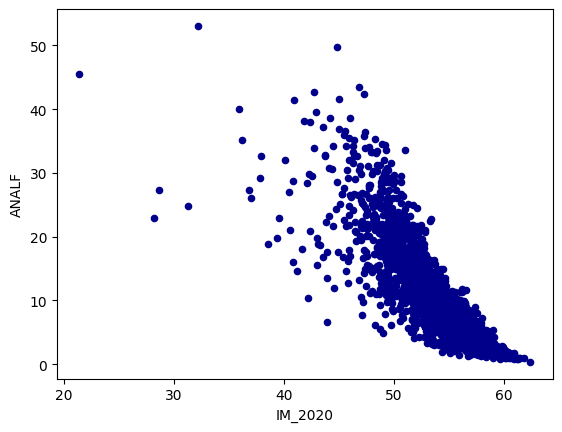

In [92]:
IMM_2020_ANALF_IM_2020 = IMM_2020[['ANALF', 'IM_2020']]
IMM_2020_ANALF_IM_2020.plot.scatter(x='IM_2020',
                      y='ANALF',
                      c='DarkBlue')

## DataFrame con indicadores por estado

Se presentará ahora un DataFrame con indicadores por estado que se obtuvieron de los datos a nivel municipal.

In [93]:
IMM_2020_Estado = IMM_2020.groupby('NOM_ENT').agg({'IM_2020': ['mean', 'std'],'ANALF': 'mean', 'SBASC':'mean', 'OVSDE':'mean', 'OVSEE':'mean',
                                                    'OVSAE':'mean', 'OVPT':'mean', 'VHAC':'mean', 'PL.5000':'mean', 'PO2SM':'mean' }).astype(str)
IMM_2020_Estado.columns=['IM_2020_mean', 'IM_2020_std', 'ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']
IMM_2020_Estado.to_parquet('IMM_2020_Estado.parquet', engine='fastparquet')
IMM_2020_Estado

,IM_2020_mean,IM_2020_std,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
NOM_ENT,,,,,,,,,,,
Aguascalientes,57.778189541872386,1.2133384112395225,3.1180489088077037,30.063086973329316,1.0560725998548262,0.5302324974618409,0.9692726315102043,1.0740213722189187,19.687024810097437,49.60616075365813,71.4606998095791
Baja California,57.78134139959474,2.2065475148914877,2.9129114177395548,29.267552174022853,0.30514038292116047,1.4838005550725442,5.243820902226222,2.3082070821645266,16.978083610534668,19.537877028648104,72.7500869053805
Baja California Sur,58.63293650886212,0.8618528339728009,2.8709501499981,27.156862305255164,0.6514673536928315,1.1849100570565287,3.7992330524284617,4.08702939102343,18.65306587219238,16.37511543438413,52.21304705536846
Campeche,54.68104722323414,2.496856090229754,8.190986680763935,34.83695544303662,4.406494915141098,1.5301666342380695,6.267696879592797,3.4871816767537656,34.48460165659586,49.13652926813818,79.98726284920872
Chiapas,51.026488458776555,3.254426555680992,16.402528927440947,54.04059130493481,2.843283597595022,1.759358293986905,10.512035442939283,13.54311975682722,41.149652050387466,75.25667797080963,91.05063302489859
Chihuahua,53.90987042777018,7.434654658362958,7.480792582617251,49.42166435577864,5.214128823805564,5.5497079295128104,4.096367900723845,6.096844620262942,16.02702146501684,74.87438164356996,73.74771467890196
Ciudad de México,60.141874585369564,1.1850339845573472,1.421790633632318,17.150186481804685,0.07345310322889578,0.06655750569171781,1.8561396956415188,0.7782804033254027,14.66772691905499,2.3100645366565646,55.5910971586408
Coahuila de Zaragoza,58.047214586144776,1.6169205582324824,2.8712038407683673,30.418295996893097,0.7186463180668561,0.4717717930383748,1.602855063295767,0.7658524866548211,16.464859460529535,46.994557469180535,70.69012055699238
Colima,57.85066404275707,1.7061500739307427,4.590371378848698,34.02210540531319,0.5984094402898434,0.5702289257129569,1.0899384255331643,3.7213157312087546,17.792644405364978,33.664786210253894,67.00942976242075


Básicamente, se calcularon los promedios de varios índices. Además, se obtuvo el promedio y la desviación estándar de IM_2020. Los promedios pueden dar una idea general de la condición del estado, y la desviación estándar se puede considerar como un parámetro de desigualdad. Entre mayor sea la desviación estandar, más variable es el índice IM_2020 en un solo estado.